In [16]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
num_itr = 70


In [17]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

In [18]:
def gradient_ascent(X, h, y):
    grad = np.dot(X.T, y - h)
    return grad

In [19]:
def update(weight, learning_rate, gradient):
    return weight + learning_rate * gradient
def update2(weight, learning_rate, gradient, landa):
    return weight + learning_rate * gradient - learning_rate * landa * weight

In [20]:
df = pd.read_csv('train.csv', header=None).astype(int)
df_label = pd.read_table('train_labels.txt', header=None).astype(int)
data = pd.concat([df, df_label], axis=1)

test = pd.read_csv('test.csv', header=None)
test_label = pd.read_table('test_labels.txt', header=None)

train, validation = np.split(data.sample(frac=1), [int(0.8*len(data))])

In [21]:
X_train = train.iloc[:, 0:5180].copy()
intercept = np.ones((X_train.shape[0], 1),)
X = np.concatenate((intercept, X_train), axis=1)
Y = train.iloc[:, -1].copy()
Y = pd.DataFrame(Y)
W = np.zeros((X.shape[1], 1))

In [22]:
X_val = validation.iloc[:, 0:5180].copy()
intercept = np.ones((X_val.shape[0], 1),)
X_v = np.concatenate((intercept, X_val), axis=1)
Y_v = validation.iloc[:, -1].copy()
Y_v = pd.DataFrame(Y_v)

In [23]:
X_test = test.copy()
intercept = np.ones((X_test.shape[0], 1),)
X_t = np.concatenate((intercept, X_test), axis=1)
Y_t = test_label.copy()

navie bayes:

In [27]:
start_time = time.time()
model = BernoulliNB(fit_prior=True)
model.fit(X_train, Y)

predict_v = model.predict(X_val)
predict_t = model.predict(X_test)
predict_v = pd.DataFrame(predict_v)
predict_t = pd.DataFrame(predict_t)

n = pd.concat([Y_v, predict_v], axis=1, ignore_index=True)
m = pd.concat([Y_t, predict_v], axis=1, ignore_index=True)

print('NB train acc:', n[n[0] == n[1]].shape[0]/n.shape[0]*100)
print('NB test acc:', m[m[0] == m[1]].shape[0]/m.shape[0]*100)
print('Train Time:', str(time.time() - start_time))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NB train acc: 3.8344491783323194
NB test acc: 21.262458471760798
Train Time: 1.500030755996704


In [25]:
train_accus = []
train_accus_reg = []
test_accus = []
test_accus_reg = []
start_time = time.time()

for i in range(num_itr):
    H = sigmoid(X, W)
    gradient = gradient_ascent(X, H, Y)
    W = update(W, 0.1, gradient)
    W_regularization = update2(W, 0.1, gradient, 7) ## landa = 0.5
    #result = sigmoid(X_v, W)

    ## validation data accuracy
    result = sigmoid(X_v, W)
    result_reg = sigmoid(X_v, W_regularization)
    comp = np.concatenate((result, Y_v), axis=1)
    comp_reg = np.concatenate((result_reg, Y_v), axis=1)
    f = pd.DataFrame(comp)
    f_reg = pd.DataFrame(comp_reg)
    f['pred'] = f[0].apply(lambda x: 0 if x < 0.5 else 1)
    f_reg['pred'] = f_reg[0].apply(lambda x: 0 if x < 0.5 else 1)
    accuracy = f.loc[f['pred'] == f[1].astype(int)].shape[0]/f.shape[0] * 100
    accuracy_reg = f_reg.loc[f_reg['pred'] == f_reg[1].astype(int)].shape[0] / f_reg.shape[0] * 100
    train_accus.append(accuracy)
    train_accus_reg.append(accuracy_reg)


    ## test data accuracy
    test_result = sigmoid(X_t, W)
    test_reg_result = sigmoid(X_t, W_regularization)
    comp = np.concatenate((test_result, Y_t), axis=1)
    comp_reg = np.concatenate((test_reg_result, Y_t), axis=1)
    f = pd.DataFrame(comp)
    f_reg = pd.DataFrame(comp_reg)
    f['pred'] = f[0].apply(lambda x: 0 if x < 0.5 else 1)
    f_reg['pred'] = f_reg[0].apply(lambda x: 0 if x < 0.5 else 1)
    test_accuracy = f.loc[f['pred'] == f[1].astype(int)].shape[0] / f.shape[0] * 100
    test_accuracy_reg = f_reg.loc[f_reg['pred'] == f_reg[1].astype(int)].shape[0] / f_reg.shape[0] * 100
    test_accus.append(test_accuracy)
    test_accus_reg.append(test_accuracy_reg)


Best Train Accuracy Value: 97.46136865342163 At Itr: 46
Average Train Accuracy: 96.61147902869754
Best Train Accuracy Value after Regularization: 97.24061810154525 At Itr: 7
Average Train Accuracy after Regularization: 94.67202775149792
Best Test Accuracy Value: 98.61572535991141 At Itr: 57
Average Test Accuracy: 97.86426198386333
Best Test Accuracy Value after Regularization: 98.56035437430786 At Itr: 28
Average Test Accuracy after Regularization: 96.11691188103148
Training Time: 4.996616840362549


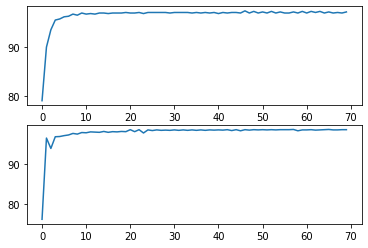

In [26]:
max_ind = np.argmax(train_accus)
max_ind_reg = np.argmax(train_accus_reg)
test_max_ind = np.argmax(test_accus)
test_max_ind_reg = np.argmax(test_accus_reg)
print('Best Train Accuracy Value:', train_accus[max_ind], 'At Itr:', max_ind)
print('Average Train Accuracy:', np.mean(train_accus))
print('Best Train Accuracy Value after Regularization:', train_accus_reg[max_ind_reg], 'At Itr:', max_ind_reg)
print('Average Train Accuracy after Regularization:', np.mean(train_accus_reg))

print('Best Test Accuracy Value:', test_accus[test_max_ind], 'At Itr:', test_max_ind)
print('Average Test Accuracy:', np.mean(test_accus))
print('Best Test Accuracy Value after Regularization:', test_accus_reg[test_max_ind_reg], 'At Itr:', test_max_ind_reg)
print('Average Test Accuracy after Regularization:', np.mean(test_accus_reg))

print('Training Time:', str(time.time() - start_time))

fig1 = plt.figure()
plt.subplot(211)
plt.plot(range(num_itr), train_accus)
plt.subplot(212)
plt.plot(range(num_itr), test_accus)


plt.show()

4527 1
########################################### 100


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 200


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 300


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 400


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 500


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 600


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 700


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 800


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 900


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 1000


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 1100


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 1200


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 1300


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 1400


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 1500


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 1600


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 1700


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 1800


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 1900


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 2000


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 2100


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 2200


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 2300


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 2400


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 2500


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 2600


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 2700


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 2800


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 2900


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 3000


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 3100


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 3200


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 3300


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 3400


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 3500


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 3600


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 3700


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 3800


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 3900


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 4000


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 4100


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 4200


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 4300


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 4400


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


########################################### 4500


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


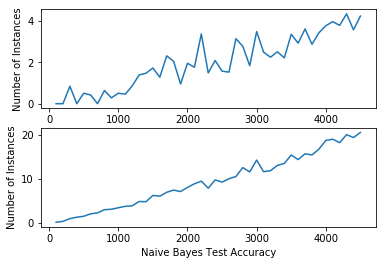

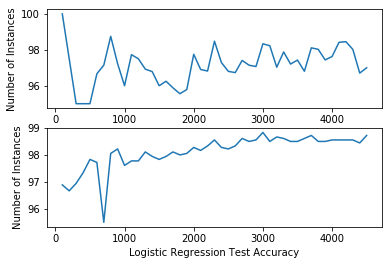

In [31]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

num_itr = 30


def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))


def gradient_ascent(X, h, y):
    grad = np.dot(X.T, y - h)
    return grad


def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient


def update_weight_mle_regularization(weight, learning_rate, gradient, landa):
    return weight + learning_rate * gradient - learning_rate * landa * weight


df = pd.read_csv('train.csv', header=None).astype(int)
df_label = pd.read_table('train_labels.txt', header=None).astype(int)
data = pd.concat([df, df_label], axis=1)
data = data.sample(frac=1)

test = pd.read_csv('test.csv', header=None)
test_label = pd.read_table('test_labels.txt', header=None)

LR_train = []
LR_test = []
NB_train = []
NB_test = []
x_axis = []
train_accus = []
train_accus_reg = []
test_accus = []
test_accus_reg = []

#for i in range(50, len(df), step=50):
j = 50
print(len(data), '1')
while j < len(data):
    j += 50
   
    x_axis.append(j)

    tmp = data.sample(n=j)
    train, validation = tmp.iloc[0:int(0.8*len(tmp))], tmp.iloc[int(0.8*len(tmp)):]

    # Train data set
    X_train = train.iloc[:, 0:5180].copy()
    intercept = np.ones((X_train.shape[0], 1))
    X = np.concatenate((intercept, X_train), axis=1)
    Y = train.iloc[:, -1].copy()
    Y = pd.DataFrame(Y)
    W = np.zeros((X.shape[1], 1))

    # Validation data set
    X_val = validation.iloc[:, 0:5180].copy()
    intercept = np.ones((X_val.shape[0], 1))
    X_v = np.concatenate((intercept, X_val), axis=1)
    Y_v = validation.iloc[:, -1].copy()
    Y_v = pd.DataFrame(Y_v)

    # Test data set
    X_test = test.copy()
    intercept = np.ones((X_test.shape[0], 1))
    X_t = np.concatenate((intercept, X_test), axis=1)
    Y_t = test_label.copy()


    ####################################### NAIVE BAYES CLF
    # model = GaussianNB()
    # model = MultinomialNB()

    start_time = time.time()
    model = BernoulliNB(fit_prior=True)
    model.fit(X_train, Y)
    # model.fit(df, df_label)

    predict_v = model.predict(X_val)
    predict_t = model.predict(X_test)
    predict_v = pd.DataFrame(predict_v)
    predict_t = pd.DataFrame(predict_t)

    n = pd.concat([Y_v, predict_v], axis=1, ignore_index=True)
    m = pd.concat([Y_t, predict_v], axis=1, ignore_index=True)
    NB_train.append(n[n[0] == n[1]].shape[0] / n.shape[0] * 100)
    NB_test.append(m[m[0] == m[1]].shape[0] / m.shape[0] * 100)
  

    ####################################### LOGISTIC REGRESSION CLF

    start_time = time.time()

    for i in range(num_itr):
        H = sigmoid(X, W)
        gradient = gradient_ascent(X, H, Y)
        W = update_weight_mle(W, 0.1, gradient)
        W_regularization = update_weight_mle_regularization(W, 0.1, gradient, 0.3) ## landa = 0.5
        #result = sigmoid(X_v, W)

        ## validation data accuracy
        result = sigmoid(X_v, W)
        result_reg = sigmoid(X_v, W_regularization)
        comp = np.concatenate((result, Y_v), axis=1)
        comp_reg = np.concatenate((result_reg, Y_v), axis=1)
        f = pd.DataFrame(comp)
        f_reg = pd.DataFrame(comp_reg)
        f['pred'] = f[0].apply(lambda x: 0 if x < 0.5 else 1)
        f_reg['pred'] = f_reg[0].apply(lambda x: 0 if x < 0.5 else 1)
        accuracy = f.loc[f['pred'] == f[1].astype(int)].shape[0]/f.shape[0] * 100
        accuracy_reg = f_reg.loc[f_reg['pred'] == f_reg[1].astype(int)].shape[0] / f_reg.shape[0] * 100
        train_accus.append(accuracy)
        train_accus_reg.append(accuracy_reg)


        ## test data accuracy
        test_result = sigmoid(X_t, W)
        test_reg_result = sigmoid(X_t, W_regularization)
        comp = np.concatenate((test_result, Y_t), axis=1)
        comp_reg = np.concatenate((test_reg_result, Y_t), axis=1)
        f = pd.DataFrame(comp)
        f_reg = pd.DataFrame(comp_reg)
        f['pred'] = f[0].apply(lambda x: 0 if x < 0.5 else 1)
        f_reg['pred'] = f_reg[0].apply(lambda x: 0 if x < 0.5 else 1)
        test_accuracy = f.loc[f['pred'] == f[1].astype(int)].shape[0] / f.shape[0] * 100
        test_accuracy_reg = f_reg.loc[f_reg['pred'] == f_reg[1].astype(int)].shape[0] / f_reg.shape[0] * 100
        test_accus.append(test_accuracy)
        test_accus_reg.append(test_accuracy_reg)


    max_ind = np.argmax(train_accus)
    max_ind_reg = np.argmax(train_accus_reg)
    test_max_ind = np.argmax(test_accus)
    test_max_ind_reg = np.argmax(test_accus_reg)
    LR_train.append(max(train_accus_reg[max_ind_reg], train_accus[max_ind]))
    LR_test.append(max(test_accus_reg[test_max_ind_reg], test_accus[test_max_ind]))


    train_accus.clear()
    train_accus_reg.clear()
    test_accus.clear()
    test_accus_reg.clear()
    j += 50

plt.figure()
plt.subplot(211)
plt.plot(x_axis, NB_train)
plt.ylabel('Number of Instances')
plt.xlabel('Naive Bayes Train Accuracy')
plt.subplot(212)
plt.plot(x_axis, NB_test)
plt.ylabel('Number of Instances')
plt.xlabel('Naive Bayes Test Accuracy')

plt.figure(2)
plt.subplot(211)
plt.plot(x_axis, LR_train)
plt.ylabel('Number of Instances')
plt.xlabel('Logistic Regression Train Accuracy')
plt.subplot(212)
plt.plot(x_axis, LR_test)
plt.ylabel('Number of Instances')
plt.xlabel('Logistic Regression Test Accuracy')

plt.show()
